In [9]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
sns.set_style()

from Materials import Material, Concrete, Steel
from Sections import Rectangular, Section, HollowRectangular, HollowCircular

In [10]:
frp = Material('FRP', 600e6, 80e9, 'black')
confining_steel = Steel('Confining Steel', 200e9, 500e6, 'blue')
reinf_steel = Steel('Reinforcing Steel', 200e9, 500e6, 'blue')
concrete = Concrete('Concrete', 37e9, 40e6, 'gray', None, frp=frp)


# test_concrete_section = HollowRectangular(concrete, 0.600, 0.600, 0.34, 0.34, 0.130)
# test_concrete_section.add_reinforcements(steel, 0.016, [(0.065,0.065) , (0.535,0.065) , (0.065,0.535) , (0.535,0.535) , (0.1825,0.065) , (0.065,0.1825) , (0.535,0.1825) , (0.1825,0.535) , (0.3,0.065) , (0.065,0.3) , (0.3,0.535) , (0.535,0.3) , (0.4175,0.065) , (0.065,0.4175) , (0.4175,0.535) , (0.535,0.4175)
# ])
test_section = Rectangular(concrete, 0.35, 0.35)
test_section.add_reinforcements(reinf_steel,0.025, [(0.05,0.05) , (0.3,0.05) , (0.05,0.3) , (0.3,0.3) , (0.133333333333333,0.05)  , (0.133333333333333,0.3) , (0.216666666666667,0.05)  , (0.216666666666667,0.3)
  ])

# # test_concrete_section.add_reinforcements(steel,0.032, [(0.065,0.065) , (0.335,0.065) , (0.065,0.335) , (0.335,0.335) , (0.1325,0.065) , (0.065,0.1325) , (0.335,0.1325) , (0.1325,0.335) , (0.2,0.065) , (0.065,0.2) , (0.2,0.335) , (0.335,0.2)
# #       ])

# test_concrete_section = HollowCircular(steel,0.60,0.02,0.3,0.3)
# test_concrete_section.add_reinforcements(concrete, 0.032, [(0.065,0.065) , (0.535,0.065) , (0.065,0.535) , (0.535,0.535) , (0.221666666666667,0.065) , (0.065,0.221666666666667) , (0.535,0.221666666666667) , (0.221666666666667,0.535) , (0.378333333333333,0.065) , (0.065,0.378333333333333) , (0.378333333333333,0.535) , (0.535,0.378333333333333)
#            ])


In [3]:
test_section.generate_slices()
test_section.calculate_neutral_axis(4500e3, concrete, reinf_steel)
print("Neutral axis:", test_section.neutral_axis)
test_section.slices.to_csv("output.csv")
test_section.slices



Neutral axis: 0.9751718416098225


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.017690270828615406 reached.
  warnings.warn(msg, RuntimeWarning)


,height,mid_height,Concrete_area,Steel_area,strain,steel_stress,concrete_stress,steel_force,concrete_force,total_force,total_moment,steel_moment
0,0.0005,0.00025,0.000175,0.0,0.003499,0.0,2.266667e+07,0.0,3966.666667,3966.666667,693.175000,0.0
1,0.0010,0.00075,0.000175,0.0,0.003497,0.0,2.266667e+07,0.0,3966.666667,3966.666667,691.191667,0.0
2,0.0015,0.00125,0.000175,0.0,0.003496,0.0,2.266667e+07,0.0,3966.666667,3966.666667,689.208333,0.0
3,0.0020,0.00175,0.000175,0.0,0.003494,0.0,2.266667e+07,0.0,3966.666667,3966.666667,687.225000,0.0
4,0.0025,0.00225,0.000175,0.0,0.003492,0.0,2.266667e+07,0.0,3966.666667,3966.666667,685.241667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.3475,0.34725,0.000175,0.0,0.002265,0.0,2.266667e+07,0.0,3966.666667,3966.666667,-683.258333,-0.0
695,0.3480,0.34775,0.000175,0.0,0.002263,0.0,2.266667e+07,0.0,3966.666667,3966.666667,-685.241667,-0.0
696,0.3485,0.34825,0.000175,0.0,0.002261,0.0,2.266667e+07,0.0,3966.666667,3966.666667,-687.225000,-0.0
697,0.3490,0.34875,0.000175,0.0,0.002260,0.0,2.266667e+07,0.0,3966.666667,3966.666667,-689.208333,-0.0


In [4]:
print(f"Sum Moment: {test_section.slices.total_moment.sum():.2f} Nm")
print(f"Sum Concrete Area: {test_section.slices.Concrete_area.sum():.6f} m^2")
print(f"Sum Steel Area: {test_section.slices.Steel_area.sum():.6f} m^2")
print(f"Sum Force: {test_section.slices.total_force.sum():.2f} Nm")
print(f"Steel Force: {test_section.slices.steel_force.sum():.2f} Nm")
print(f"Concrete Force: {test_section.slices.concrete_force.sum():.2f} Nm")

0.351859

Sum Moment: 1501.06 Nm
Sum Concrete Area: 0.118404 m^2
Sum Steel Area: 0.003921 m^2
Sum Force: 4388477.04 Nm
Steel Force: 1704645.92 Nm
Concrete Force: 2683831.13 Nm


0.351859

c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


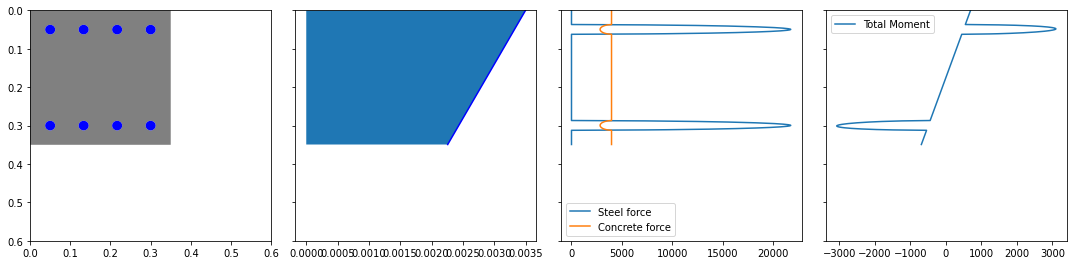

In [5]:

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.125    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

fig, axs = plt.subplots(1, 4, sharey=True, squeeze=True, figsize=(16, 4))
                       
axs[0].invert_yaxis()
axs[0].set_ylim(0,0.6)
axs[0].set_xlim(0,0.6)
axs[0].invert_yaxis()

slices = test_section.slices
test_section.plot(axs[0])

for ax in axs:
    ax.axhline(test_section.neutral_axis, color='red')

axs[1].plot(
    slices.strain,
    slices.mid_height,
    color='blue'
    
)

axs[1].fill_betweenx(
    slices.mid_height,0,slices.strain,
    
)

axs[2].plot(
    slices.steel_force,
    slices.mid_height,
    label = "Steel force"
)
axs[2].plot(
    slices.concrete_force,
    slices.mid_height,
    label = "Concrete force"
)
axs[2].legend()

    
# axs[2].plot(
#     slices.steel_stress,
#     slices.mid_height,
#     label = "Steel stress"
# )
# axs[2].plot(
#     slices.concrete_stress,
#     slices.mid_height,
#     label = "Concrete stress"
# )
# axs[2].legend()

axs[3].plot(
    slices.total_moment,
    slices.mid_height,
    label = "Total Moment"
# )
# axs[3].plot(
#     slices.concrete_moment,
#     slices.mid_height,
#     label = "Concrete Moment"
)
axs[3].legend()

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3)
# [ax.set_aspect('equal') for ax in axs.ravel()]



In [6]:
test_section.generate_slices()
test_section.calculate_neutral_axis(4500e3, concrete, steel)
print("Neutral axis:", test_section.neutral_axis)
test_section.slices.to_csv("output.csv")
test_section.slices


NameError: name 'steel' is not defined

In [13]:

test_section.generate_slices()
axial_loads = np.arange(0, 10000e3, 100000)
out = []
for axial_load in axial_loads:
    test_section.calculate_neutral_axis(axial_load, concrete, reinf_steel)
    total_moment = test_section.slices.total_moment.sum()
    print(axial_load, total_moment)
    out.append({'axial_load': axial_load, 'total_moment': total_moment})
interaction_table = pd.DataFrame(out)
interaction_table

0.0 222844.6006041824
100000.0 234906.50398688976
200000.0 246742.58204006095
300000.0 258299.91085896257
400000.0 269518.7741637683
500000.0 280307.85644261737
600000.0 290482.8075483581
700000.0 299822.5884138193
800000.0 308030.97048625816
900000.0 314739.1575867422
1000000.0 319626.0109698765
1100000.0 322923.1030135138
1200000.0 319582.39318648714
1300000.0 312620.8312671973
1400000.0 305280.78675846476
1500000.0 297939.51592392003
1600000.0 290578.89103412954
1700000.0 283179.4481643738
1800000.0 275719.53574318544
1900000.0 268175.89063000144
2000000.0 260523.63307745982


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 20918522018292.5 reached.
  warnings.warn(msg, RuntimeWarning)


2100000.0 -92089.0813070789


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.027208712923198805 reached.
  warnings.warn(msg, RuntimeWarning)


2200000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.03617488223153437 reached.
  warnings.warn(msg, RuntimeWarning)


2300000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.05322544729725209 reached.
  warnings.warn(msg, RuntimeWarning)


2400000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.07596929853328882 reached.
  warnings.warn(msg, RuntimeWarning)


2500000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.10566213289059578 reached.
  warnings.warn(msg, RuntimeWarning)


2600000.0 852.322959387413


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.14490531727872552 reached.
  warnings.warn(msg, RuntimeWarning)


2700000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.2490634308414521 reached.
  warnings.warn(msg, RuntimeWarning)


2800000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.4936207076328579 reached.
  warnings.warn(msg, RuntimeWarning)


2900000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.9993629725626036 reached.
  warnings.warn(msg, RuntimeWarning)


3000000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -2.218263177308378 reached.
  warnings.warn(msg, RuntimeWarning)


3100000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -5.453389508299837 reached.
  warnings.warn(msg, RuntimeWarning)


3200000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -4.34834819247303 reached.
  warnings.warn(msg, RuntimeWarning)


3300000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.5888477223812818 reached.
  warnings.warn(msg, RuntimeWarning)


3400000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -2.5916528334698974 reached.
  warnings.warn(msg, RuntimeWarning)


3500000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 14.827627135217464 reached.
  warnings.warn(msg, RuntimeWarning)


3600000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -2.0361390887733934 reached.
  warnings.warn(msg, RuntimeWarning)


3700000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 3.1964163729982418 reached.
  warnings.warn(msg, RuntimeWarning)


3800000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 19.19409244838331 reached.
  warnings.warn(msg, RuntimeWarning)


3900000.0 852.3229593873984


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.05660421662259896 reached.
  warnings.warn(msg, RuntimeWarning)


4000000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.04277863688475503 reached.
  warnings.warn(msg, RuntimeWarning)


4100000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.02843639827071187 reached.
  warnings.warn(msg, RuntimeWarning)


4200000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of -0.013577500780469154 reached.
  warnings.warn(msg, RuntimeWarning)


4300000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.001798055585973457 reached.
  warnings.warn(msg, RuntimeWarning)


4400000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.017690270828615406 reached.
  warnings.warn(msg, RuntimeWarning)


4500000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.034099144947456805 reached.
  warnings.warn(msg, RuntimeWarning)


4600000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.051024677942497876 reached.
  warnings.warn(msg, RuntimeWarning)


4700000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.06846686981373895 reached.
  warnings.warn(msg, RuntimeWarning)


4800000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.08642572056117825 reached.
  warnings.warn(msg, RuntimeWarning)


4900000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.104901230184818 reached.
  warnings.warn(msg, RuntimeWarning)


5000000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.12389339868465798 reached.
  warnings.warn(msg, RuntimeWarning)


5100000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.14340222606069686 reached.
  warnings.warn(msg, RuntimeWarning)


5200000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.16342771231293574 reached.
  warnings.warn(msg, RuntimeWarning)


5300000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.18396985744137195 reached.
  warnings.warn(msg, RuntimeWarning)


5400000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.20502866144600929 reached.
  warnings.warn(msg, RuntimeWarning)


5500000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.2266041243268464 reached.
  warnings.warn(msg, RuntimeWarning)


5600000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.24869624608388463 reached.
  warnings.warn(msg, RuntimeWarning)


5700000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.27130502671712087 reached.
  warnings.warn(msg, RuntimeWarning)


5800000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.2944304662265549 reached.
  warnings.warn(msg, RuntimeWarning)


5900000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.3180725646121907 reached.
  warnings.warn(msg, RuntimeWarning)


6000000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.34223132187402494 reached.
  warnings.warn(msg, RuntimeWarning)


6100000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.3669067380120612 reached.
  warnings.warn(msg, RuntimeWarning)


6200000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.39209881302629657 reached.
  warnings.warn(msg, RuntimeWarning)


6300000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.4178075469167253 reached.
  warnings.warn(msg, RuntimeWarning)


6400000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.44403293968336177 reached.
  warnings.warn(msg, RuntimeWarning)


6500000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.4707749913261936 reached.
  warnings.warn(msg, RuntimeWarning)


6600000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.49803370184522433 reached.
  warnings.warn(msg, RuntimeWarning)


6700000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.525809071240467 reached.
  warnings.warn(msg, RuntimeWarning)
c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.5541010995118958 reached.
  warnings.warn(msg, RuntimeWarning)


6800000.0 1501.0635224379948
6900000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.5829097866595314 reached.
  warnings.warn(msg, RuntimeWarning)


7000000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.6122351326833555 reached.
  warnings.warn(msg, RuntimeWarning)


7100000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.642077137583392 reached.
  warnings.warn(msg, RuntimeWarning)
c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.6724358013596194 reached.
  warnings.warn(msg, RuntimeWarning)


7200000.0 1501.0635224379948
7300000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.7033111240120533 reached.
  warnings.warn(msg, RuntimeWarning)


7400000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.7347031055406734 reached.
  warnings.warn(msg, RuntimeWarning)


7500000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.76661174594551 reached.
  warnings.warn(msg, RuntimeWarning)
c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.7990370452265365 reached.
  warnings.warn(msg, RuntimeWarning)


7600000.0 1501.0635224379948
7700000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.8319790033837593 reached.
  warnings.warn(msg, RuntimeWarning)


7800000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.8654376204171947 reached.
  warnings.warn(msg, RuntimeWarning)


7900000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.899412896326818 reached.
  warnings.warn(msg, RuntimeWarning)


8000000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.9339048311126354 reached.
  warnings.warn(msg, RuntimeWarning)


8100000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 0.9689134247746638 reached.
  warnings.warn(msg, RuntimeWarning)


8200000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.0044386773129026 reached.
  warnings.warn(msg, RuntimeWarning)


8300000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.040480588727328 reached.
  warnings.warn(msg, RuntimeWarning)


8400000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.07703915901795 reached.
  warnings.warn(msg, RuntimeWarning)


8500000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.1141143881847764 reached.
  warnings.warn(msg, RuntimeWarning)


8600000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.1517062762277932 reached.
  warnings.warn(msg, RuntimeWarning)


8700000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.1898148231470185 reached.
  warnings.warn(msg, RuntimeWarning)


8800000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.228440028942438 reached.
  warnings.warn(msg, RuntimeWarning)


8900000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.2675818936140573 reached.
  warnings.warn(msg, RuntimeWarning)


9000000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.3072404171618726 reached.
  warnings.warn(msg, RuntimeWarning)


9100000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.3474155995859016 reached.
  warnings.warn(msg, RuntimeWarning)


9200000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.3881074408861127 reached.
  warnings.warn(msg, RuntimeWarning)


9300000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.4293159410625547 reached.
  warnings.warn(msg, RuntimeWarning)


9400000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.4710411001151789 reached.
  warnings.warn(msg, RuntimeWarning)


9500000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.513282918043987 reached.
  warnings.warn(msg, RuntimeWarning)


9600000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.5560413948490124 reached.
  warnings.warn(msg, RuntimeWarning)


9700000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.5993165305302355 reached.
  warnings.warn(msg, RuntimeWarning)


9800000.0 1501.0635224379948
9900000.0 1501.0635224379948


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\scipy\optimize\_zeros_py.py:348: RuntimeWarning: Tolerance of 1.6431083250876568 reached.
  warnings.warn(msg, RuntimeWarning)


,axial_load,total_moment
0,0.0,222844.600604
1,100000.0,234906.503987
2,200000.0,246742.582040
3,300000.0,258299.910859
4,400000.0,269518.774164
...,...,...
95,9500000.0,1501.063522
96,9600000.0,1501.063522
97,9700000.0,1501.063522
98,9800000.0,1501.063522


<AxesSubplot:xlabel='total_moment', ylabel='axial_load'>

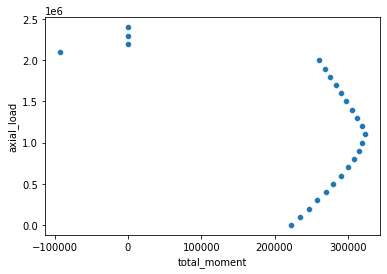

In [19]:
sns.scatterplot(
    data = interaction_table[interaction_table.axial_load < 0.25e7],
    y = 'axial_load',
    x = 'total_moment'
)